In [1]:
from geodata import Dataset
from geodata.model.wind import WindExtrapolationModel
import matplotlib.pyplot as plt

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2023-08-24 12:59:35,310 - geodata - WARNING - Numba not installed. Using pure Python implementation.


In [2]:
dataset = Dataset(
    module="merra2",
    weather_data_config="slv_flux_hourly",
    years=slice(2010, 2010),
    months=slice(1,1)
)

model = WindExtrapolationModel(dataset)
model.prepare()

2023-08-24 12:59:37,212 - geodata.dataset - INFO - Using global bounds.
2023-08-24 12:59:37,213 - geodata.dataset - INFO - Directory /Users/apple/.local/geodata/merra2 found, checking for completeness.
2023-08-24 12:59:37,218 - geodata.dataset - INFO - Directory complete.
2023-08-24 12:59:45,633 - geodata - INFO - The model is already prepared.


In [3]:
speed1 = model.estimate(
    height=2,
    xs=slice(1, 1),
    ys=slice(1, 1),
    years=slice(2010, 2010),
    months=slice(1, 1)
)

In [6]:
speed1loc = speed1.isel(lat=10, lon=10)
speed1loc = speed1loc.load()

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dask/core.py:121: RuntimeWarning: overflow encountered in exp
  return func(*(_execute_task(a, cache) for a in args))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dask/core.py:121: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dask/core.py:121: RuntimeWarning: overflow encountered in divide
  return func(*(_execute_task(a, cache) for a in args))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dask/core.py:121: RuntimeWarning: divide by zero encountered in log
  return func(*(_execute_task(a, cache) for a in args))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in log
  return func(*(_execute_task(a, cache) for

In [7]:
speed2 = model.estimate(
    height=10,
    xs=slice(1, 1),
    ys=slice(1, 1),
    years=slice(2010, 2010),
    months=slice(1, 1)
)

In [8]:
speed2loc = speed2.isel(lat=10, lon=10)
speed2loc = speed2loc.load()

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dask/core.py:121: RuntimeWarning: overflow encountered in exp
  return func(*(_execute_task(a, cache) for a in args))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dask/core.py:121: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dask/core.py:121: RuntimeWarning: overflow encountered in divide
  return func(*(_execute_task(a, cache) for a in args))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dask/core.py:121: RuntimeWarning: divide by zero encountered in log
  return func(*(_execute_task(a, cache) for a in args))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in log
  return func(*(_execute_task(a, cache) for

In [9]:
speed3 = model.estimate(
    height=50,
    xs=slice(1, 1),
    ys=slice(1, 1),
    years=slice(2010, 2010),
    months=slice(1, 1)
)

In [10]:
speed3loc = speed3.isel(lat=10, lon=10)
speed3loc = speed3loc.load()

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dask/core.py:121: RuntimeWarning: overflow encountered in exp
  return func(*(_execute_task(a, cache) for a in args))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dask/core.py:121: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dask/core.py:121: RuntimeWarning: overflow encountered in divide
  return func(*(_execute_task(a, cache) for a in args))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dask/core.py:121: RuntimeWarning: divide by zero encountered in log
  return func(*(_execute_task(a, cache) for a in args))


In [11]:
speed4 = model.estimate(
    height=80, # extrapolation in high heights
    xs=slice(1, 1),
    ys=slice(1, 1),
    years=slice(2010, 2010),
    months=slice(1, 1)
)

2/5/10/80, log pattern, actual hub height (no need for model)


In [12]:
speed4loc = speed4.isel(lat=10, lon=10)
speed4loc = speed4loc.load()

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dask/core.py:121: RuntimeWarning: overflow encountered in exp
  return func(*(_execute_task(a, cache) for a in args))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dask/core.py:121: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dask/core.py:121: RuntimeWarning: overflow encountered in divide
  return func(*(_execute_task(a, cache) for a in args))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dask/core.py:121: RuntimeWarning: divide by zero encountered in log
  return func(*(_execute_task(a, cache) for a in args))


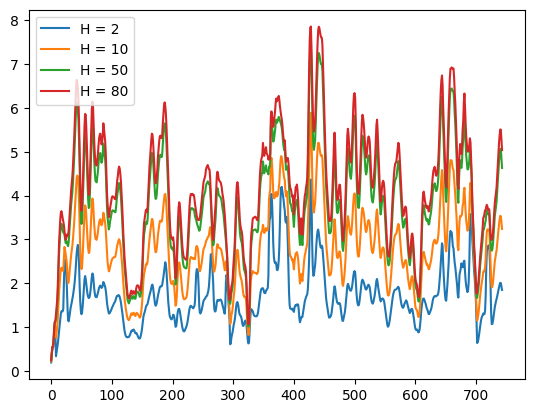

In [14]:
plt.plot(speed1loc, label='H = 2');
plt.plot(speed2loc, label='H = 10');
plt.plot(speed3loc, label='H = 50');
plt.plot(speed4loc, label='H = 80');
plt.legend()
plt.show()